<a href="https://colab.research.google.com/github/aarupach/Aaru/blob/main/Aaru_diabetes_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve


In [ ]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
           'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df = pd.read_csv(url, names=columns)

In [ ]:
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nStatistical Summary:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nClass Distribution:")
print(df['Outcome'].value_counts())

Dataset Shape: (768, 9)

First 5 rows:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 

In [ ]:
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)


In [ ]:
df.fillna(df.median(), inplace=True)


In [ ]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
print("\n" + "="*60)
print("MODEL TRAINING AND EVALUATION")
print("="*60)


MODEL TRAINING AND EVALUATION


In [ ]:
print("\n1. LOGISTIC REGRESSION")
print("-" * 60)
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
lr_prob = lr_model.predict_proba(X_test_scaled)[:, 1]
print(f"Accuracy: {accuracy_score(y_test, lr_pred):.4f}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, lr_prob):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, lr_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, lr_pred))


1. LOGISTIC REGRESSION
------------------------------------------------------------
Accuracy: 0.7078
ROC-AUC Score: 0.8130

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.60      0.50      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154


Confusion Matrix:
[[82 18]
 [27 27]]


In [ ]:
print("\n2. DECISION TREE")
print("-" * 60)
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_prob = dt_model.predict_proba(X_test)[:, 1]

print(f"Accuracy: {accuracy_score(y_test, dt_pred):.4f}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, dt_prob):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, dt_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, dt_pred))


2. DECISION TREE
------------------------------------------------------------
Accuracy: 0.7597
ROC-AUC Score: 0.7622

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       100
           1       0.64      0.72      0.68        54

    accuracy                           0.76       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.77      0.76      0.76       154


Confusion Matrix:
[[78 22]
 [15 39]]


In [ ]:
print(f"Accuracy: {accuracy_score(y_test, rf_pred):.4f}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, rf_prob):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, rf_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, rf_pred))

Accuracy: 0.7403
ROC-AUC Score: 0.8144

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       100
           1       0.67      0.52      0.58        54

    accuracy                           0.74       154
   macro avg       0.72      0.69      0.70       154
weighted avg       0.73      0.74      0.73       154


Confusion Matrix:
[[86 14]
 [26 28]]


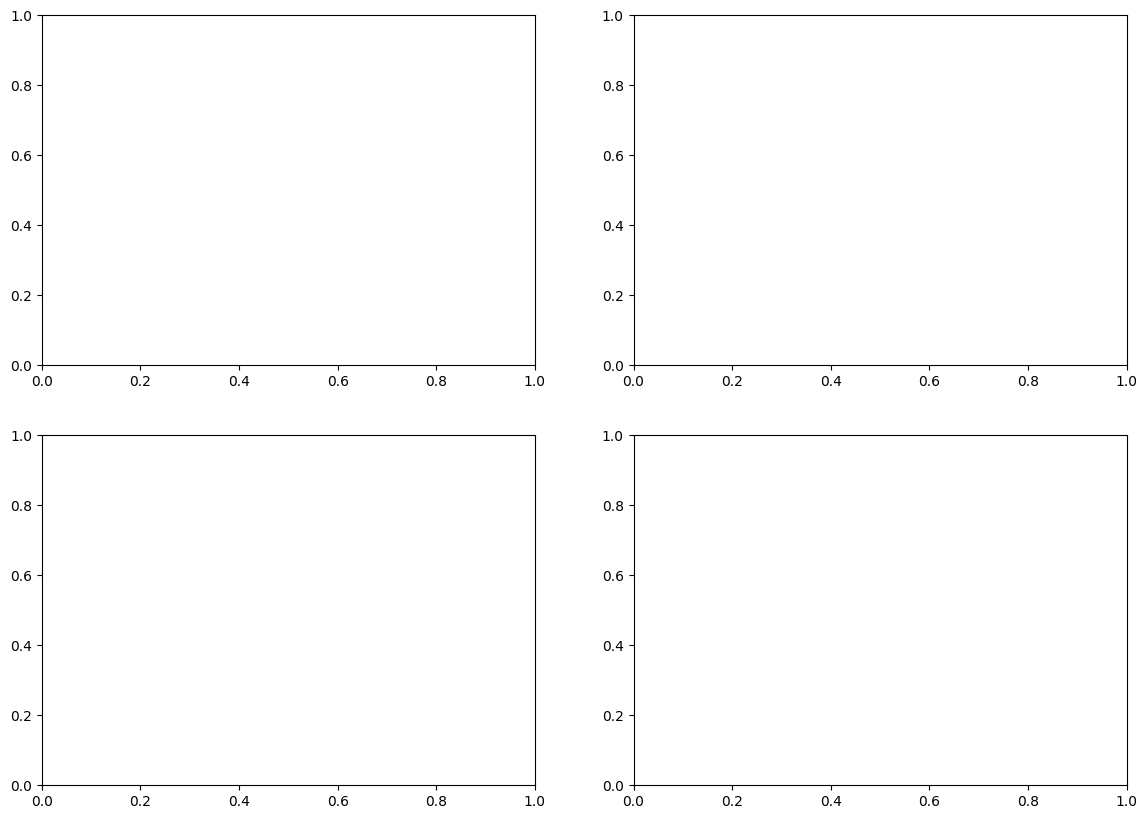

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

In [ ]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_prob)
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_prob)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_prob)

In [ ]:
axes[0, 0].plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC={roc_auc_score(y_test, lr_prob):.3f})')
axes[0, 0].plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC={roc_auc_score(y_test, dt_prob):.3f})')
axes[0, 0].plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC={roc_auc_score(y_test, rf_prob):.3f})')
axes[0, 0].plot([0, 1], [0, 1], 'k--', label='Random Classifier')
axes[0, 0].set_xlabel('False Positive Rate')
axes[0, 0].set_ylabel('True Positive Rate')
axes[0, 0].set_title('ROC Curves Comparison')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

In [ ]:
cm_rf = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axes[0, 1])
axes[0, 1].set_title('Confusion Matrix - Random Forest')
axes[0, 1].set_ylabel('Actual')
axes[0, 1].set_xlabel('Predicted')

Text(0.5, 500.7222222222223, 'Predicted')

In [ ]:
feature_importance.plot(x='Feature', y='Importance', kind='barh', ax=axes[1, 0], legend=False)
axes[1, 0].set_title('Feature Importance - Random Forest')
axes[1, 0].set_xlabel('Importance')

Text(0.5, 80.7222222222222, 'Importance')

In [ ]:
models = ['Logistic\nRegression', 'Decision\nTree', 'Random\nForest']
accuracies = [
    accuracy_score(y_test, lr_pred),
    accuracy_score(y_test, dt_pred),
    accuracy_score(y_test, rf_pred)
]
axes[1, 1].bar(models, accuracies, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[1, 1].set_ylabel('Accuracy')
axes[1, 1].set_title('Model Accuracy Comparison')
axes[1, 1].set_ylim([0.6, 0.9])
for i, v in enumerate(accuracies):
    axes[1, 1].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [ ]:
print("\n" + "="*60)
print("EXAMPLE PREDICTION")
print("="*60)
sample_data = X_test.iloc[0:1]
print("Sample Input:")
print(sample_data)
print(f"\nActual Outcome: {y_test.iloc[0]}")
print(f"Random Forest Prediction: {rf_model.predict(sample_data)[0]}")
print(f"Prediction Probability: {rf_model.predict_proba(sample_data)[0][1]:.4f}")


EXAMPLE PREDICTION
Sample Input:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
44            7    159.0           64.0           29.0    125.0  27.4   

    DiabetesPedigreeFunction  Age  
44                     0.294   40  

Actual Outcome: 0
Random Forest Prediction: 1
Prediction Probability: 0.6097
